In [2]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

In [14]:
def show(img_bgr, title='image'):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title(title)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [15]:
def equalizeHist(image):
    
    # split g,b,r
    g = image[:,:,0]
    b = image[:,:,1]
    r = image[:,:,2]

    # Histogram Equalization
    r2 = cv2.equalizeHist(r)
    g2 = cv2.equalizeHist(g)
    b2 = cv2.equalizeHist(b)

    im2 = image.copy()
    im2[:,:,0] = g2
    im2[:,:,1] = b2
    im2[:,:,2] = r2
    
    return im2

In [16]:
def blur(image):
    # r = cv2.GaussianBlur(image, (25, 25),0)
    r = cv2.medianBlur(image, 15)
    return r

In [17]:
def get_threshold(image, hsv_minmax):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV )
    
    threshold = np.zeros_like(hsv[:, :, 0])
    for v in hsv_minmax:
        hsv_min, hsv_max = v
        threshold = cv2.bitwise_or(threshold, cv2.inRange(hsv, hsv_min, hsv_max))
      
    return threshold

In [18]:
def morphology(threshold, n=5, open=True):
    kernel = np.ones((n, n), np.uint8)
    erosion = cv2.morphologyEx(threshold, cv2.MORPH_OPEN if open else cv2.MORPH_CLOSE, kernel)
    
    return erosion

In [19]:
def findContours(threshold):
    contours, hierarchy = cv2.findContours( threshold.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours, hierarchy

In [20]:
def drawContours(image, contours, hierarchy, color=(255,0,0), width=2):
    im2 = image.copy()
    cv2.drawContours( im2, contours, -1, color, width, cv2.LINE_AA, hierarchy, 1)
    
    return im2

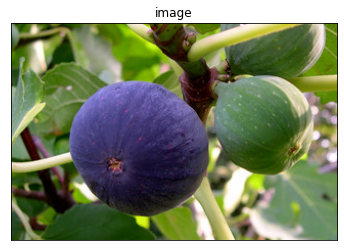

In [37]:
filename = 'figa.jpg'

im_orig = cv2.imread(filename)
show(im_orig)

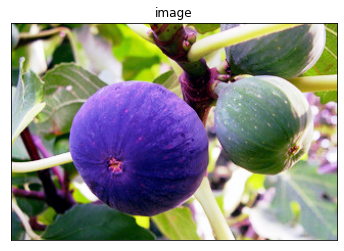

In [38]:
im_eqhist = equalizeHist(im_orig)
show(im_eqhist)

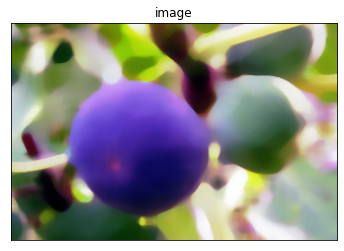

In [39]:
im_blur = blur(im_eqhist)
show(im_blur)

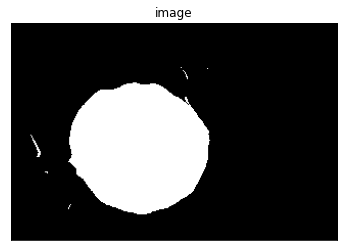

In [40]:
if filename == 'r.jpg':
    hsv_min = np.array((0, 60, 120), np.uint8)
    hsv_max = np.array((20, 255, 255), np.uint8)
    hsv_min2 = np.array((170, 60, 120), np.uint8)
    hsv_max2 = np.array((255, 255, 255), np.uint8)
    hsv_minmax = [(hsv_min, hsv_max), (hsv_min2, hsv_max2)]  
elif filename == 'apple.jpg':
    hsv_min = np.array((0, 87, 0), np.uint8)
    hsv_max = np.array((21, 255, 121), np.uint8)
    hsv_min2 = np.array((141, 95, 0), np.uint8)
    hsv_max2 = np.array((255, 255, 255), np.uint8)
    hsv_minmax = [(hsv_min, hsv_max), (hsv_min2, hsv_max2)]
elif filename == 'figa.jpg':
    hsv_min = np.array((116, 101, 45), np.uint8)
    hsv_max = np.array((154, 255, 255), np.uint8)
    hsv_minmax = [(hsv_min, hsv_max)]
else:
    print("I don't know threshold for this image")

threshold = get_threshold(im_blur, hsv_minmax)

show(threshold)

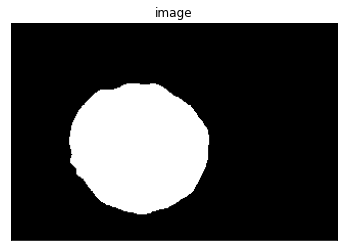

In [41]:
threshold_m = morphology(threshold)
show(threshold_m)

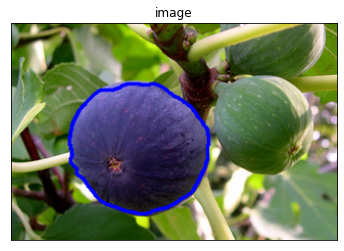

In [42]:
contours, hierarchy = findContours(threshold_m)

im_contours = drawContours(im_orig, contours, hierarchy)
show(im_contours)

In [21]:
def colorFilter(filename):
    im_orig = cv2.imread(filename)
    im_eqhist = equalizeHist(im_orig)
    im_blur = blur(im_eqhist)
    
    if filename == 'r.jpg':
        hsv_min = np.array((0, 60, 120), np.uint8)
        hsv_max = np.array((20, 255, 255), np.uint8)
        hsv_min2 = np.array((170, 60, 120), np.uint8)
        hsv_max2 = np.array((255, 255, 255), np.uint8)
        hsv_minmax = [(hsv_min, hsv_max), (hsv_min2, hsv_max2)]  
    elif filename == 'apple.jpg':
        hsv_min = np.array((0, 87, 0), np.uint8)
        hsv_max = np.array((21, 255, 121), np.uint8)
        hsv_min2 = np.array((141, 95, 0), np.uint8)
        hsv_max2 = np.array((255, 255, 255), np.uint8)
        hsv_minmax = [(hsv_min, hsv_max), (hsv_min2, hsv_max2)]
    elif filename == 'figa.jpg':
        hsv_min = np.array((116, 101, 45), np.uint8)
        hsv_max = np.array((154, 255, 255), np.uint8)
        hsv_minmax = [(hsv_min, hsv_max)]
    else:
        print("I don't know threshold for this image")
        return
        
    threshold = get_threshold(im_blur, hsv_minmax)
    
    threshold_m = morphology(threshold)
    
    contours, hierarchy = findContours(threshold_m)

    im_contours = drawContours(im_orig, contours, hierarchy)
    
    return im_contours

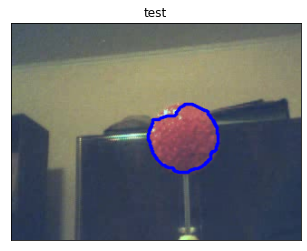

In [36]:
show(colorFilter('r.jpg'), 'test')

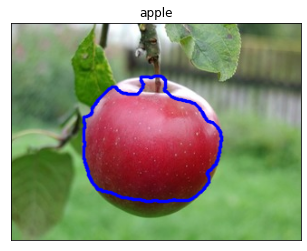

In [27]:
show(colorFilter('apple.jpg'), 'apple')

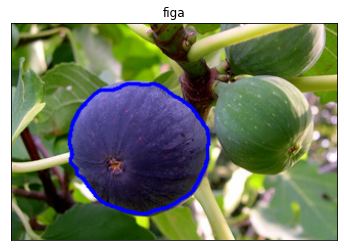

In [28]:
show(colorFilter('figa.jpg'), 'figa')

In [35]:
# создаем пустую функцию 
def nothing(args):pass

# создаем окно для отображения результата и бегунки
cv2.namedWindow("setup")
cv2.createTrackbar("h1", "setup", 0, 255, nothing)
cv2.createTrackbar("s1", "setup", 0, 255, nothing)
cv2.createTrackbar("v1", "setup", 0, 255, nothing)
cv2.createTrackbar("h2", "setup", 255, 255, nothing)
cv2.createTrackbar("s2", "setup", 255, 255, nothing)
cv2.createTrackbar("v2", "setup", 255, 255, nothing)

im = cv2.imread('figa.jpg')

while True:
    h1 = cv2.getTrackbarPos('h1', 'setup')
    s1 = cv2.getTrackbarPos('s1', 'setup')
    v1 = cv2.getTrackbarPos('v1', 'setup')
    h2 = cv2.getTrackbarPos('h2', 'setup')
    s2 = cv2.getTrackbarPos('s2', 'setup')
    v2 = cv2.getTrackbarPos('v2', 'setup')
    # собираем значения из бегунков в множества
    min_p = (h1, s1, v1)
    max_p = (h2, s2, v2)
    # применяем фильтр, делаем бинаризацию
    img_g = cv2.inRange(hsv, min_p, max_p)

    cv2.imshow('img', img_g)
    
    if cv2.waitKey(33) & 0xFF == ord('q'):
        print ('min: ' + str(h1) + ' ' + str(s1) + ' ' + str(v1))
        print ('max: ' + str(h2) + ' ' + str(s2) + ' ' + str(v2))
        break

cv2.destroyAllWindows()

min: 116 101 45
max: 154 255 255
